In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [61]:
df = pd.read_csv('Sunspots.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.drop(index=df[df["Monthly Mean Total Sunspot Number"] == 0].index,inplace=True)

In [62]:
df['Sunspot_lag1'] = df['Monthly Mean Total Sunspot Number'].shift(1)
df['Sunspot_lag12'] = df['Monthly Mean Total Sunspot Number'].shift(12)
df['Sunspot_lag132'] = df['Monthly Mean Total Sunspot Number'].shift(132)
df['Diff_1Year'] = df['Sunspot_lag1'] - df['Sunspot_lag12']
df['Diff_11Year'] = df['Sunspot_lag1'] - df['Sunspot_lag132']
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df = df.dropna().reset_index(drop=True)

In [63]:
features = ['Month_sin', 'Month_cos', 'Year','Month',
            'Sunspot_lag1', 'Sunspot_lag12', 'Sunspot_lag132','Diff_11Year','Diff_1Year']
X = df[features]
y = df['Monthly Mean Total Sunspot Number']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [66]:
model = LGBMRegressor(random_state=42)
model.fit(X_train_scaled, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 2452, number of used features: 9
[LightGBM] [Info] Start training from score 84.358034


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [67]:
y_pred = model.predict(X_test_scaled)

c:\Users\Monster\Desktop\Python\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [68]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [69]:
print(" LightGBM ")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

 LightGBM 
R² Score: 0.8446
MSE: 744.44
MAE: 19.22


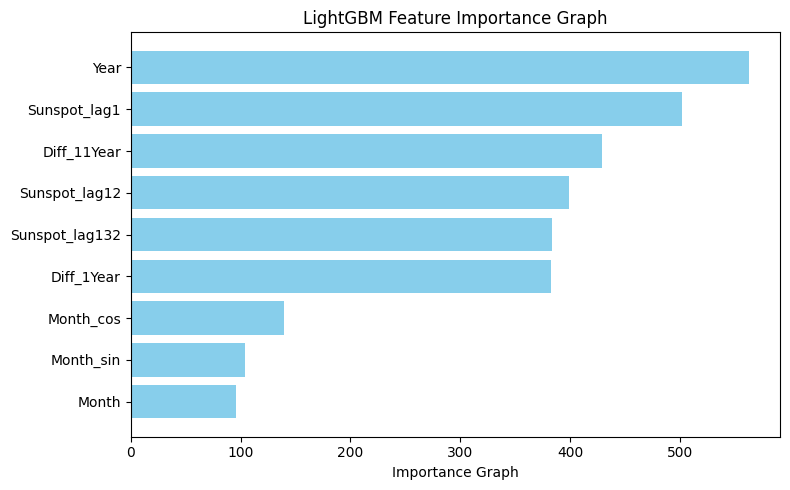

In [70]:
import matplotlib.pyplot as plt


feature_names = X.columns
importances = model.feature_importances_


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)


plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['importance'], color='skyblue')
plt.xlabel("Importance Graph")
plt.title("LightGBM Feature Importance Graph")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

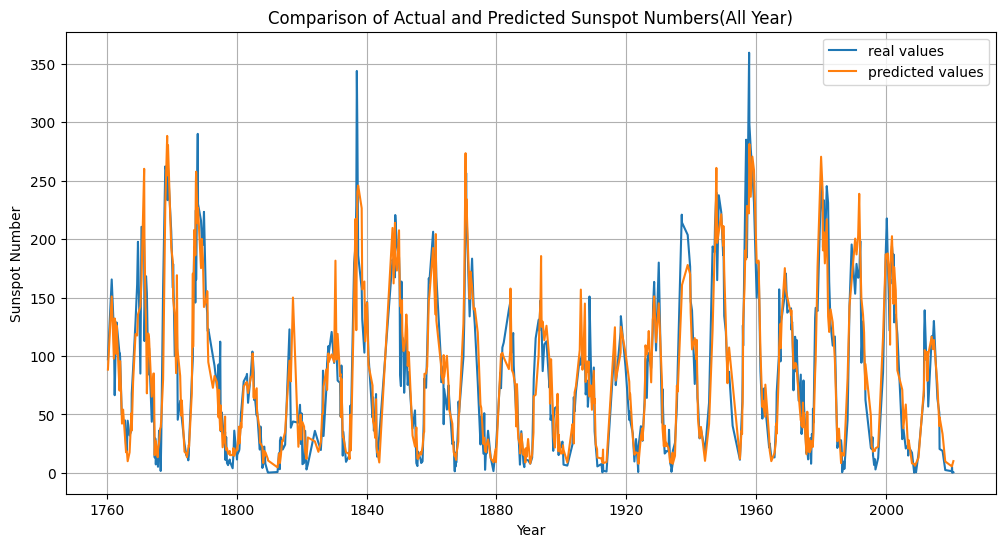

In [71]:
results_df = pd.DataFrame({'real': y_test, 'estimated': y_pred})
results_df = results_df.join(df['Date']) 


results_df = results_df.sort_values(by='Date')

plt.figure(figsize=(12, 6))
plt.plot(results_df['Date'], results_df['real'], label='real values')
plt.plot(results_df['Date'], results_df['estimated'], label='predicted values')
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.title("Comparison of Actual and Predicted Sunspot Numbers(All Year)")
plt.legend()
plt.grid(True)
plt.show()

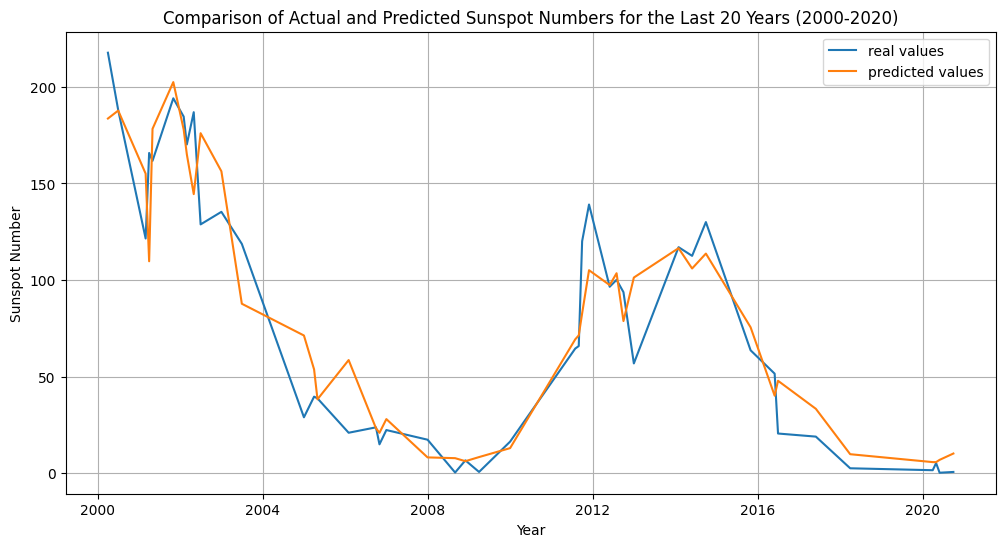

In [72]:
results_df = pd.DataFrame({'real': y_test, 'estimated': y_pred})


results_df = results_df.join(df['Date'])


results_df['Date'] = pd.to_datetime(results_df['Date'])


results_df = results_df.sort_values(by='Date')


end_year = results_df['Date'].dt.year.max()
start_year = end_year - 20
results_last_20_years = results_df[results_df['Date'].dt.year >= start_year].copy()

plt.figure(figsize=(12, 6))
plt.plot(results_last_20_years['Date'], results_last_20_years['real'], label='real values')
plt.plot(results_last_20_years['Date'], results_last_20_years['estimated'], label='predicted values')
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.title(f"Comparison of Actual and Predicted Sunspot Numbers for the Last 20 Years (2000-2020)")
plt.legend()
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

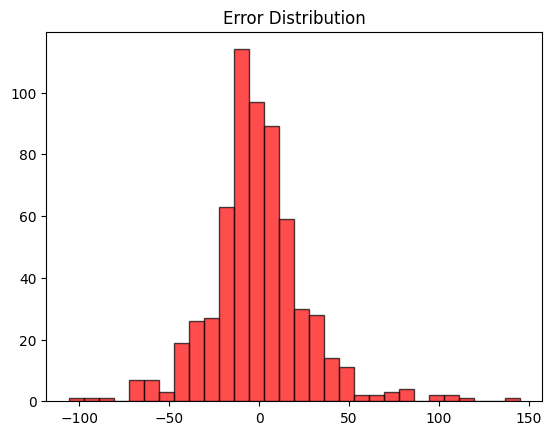

In [73]:
errors = y_test - y_pred
plt.hist(errors,bins=30,color='red',edgecolor='black',alpha=0.7 )
plt.title('Error Distribution')
plt.show

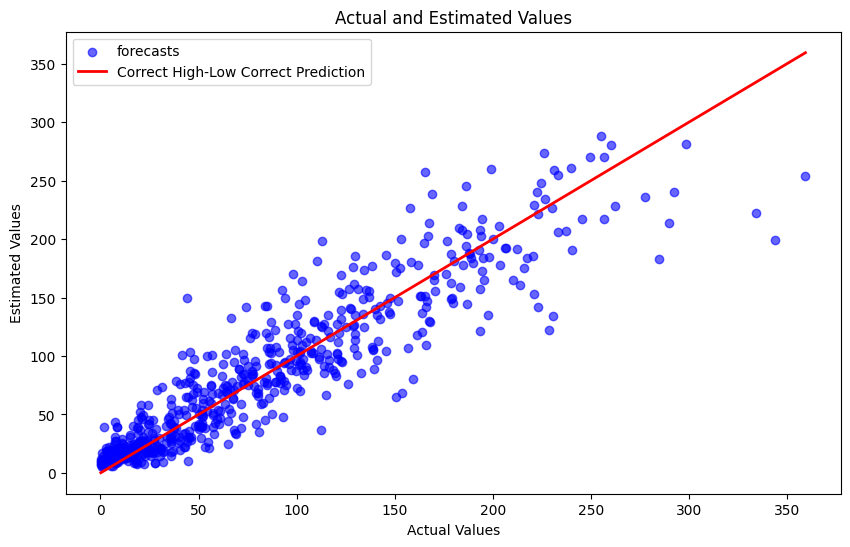

In [74]:

plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='forecasts')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Correct High-Low Correct Prediction')


plt.title('Actual and Estimated Values')
plt.xlabel('Actual Values')
plt.ylabel('Estimated Values')


plt.legend()


plt.show()

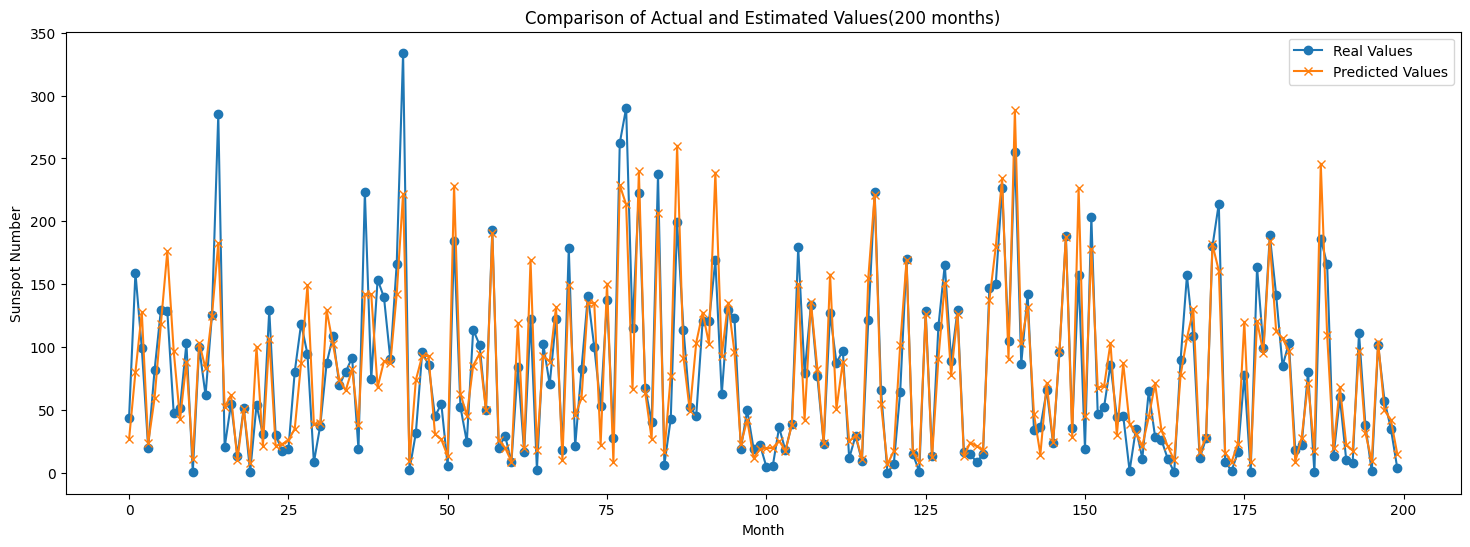

In [75]:
plt.figure(figsize=(18, 6))
plt.plot(range(len(y_test[:200])), y_test[:200], label="Real Values", marker='o')
plt.plot(range(len(y_pred[:200])), y_pred[:200], label="Predicted Values", marker='x')
plt.xlabel("Month")
plt.ylabel("Sunspot Number")
plt.title("Comparison of Actual and Estimated Values(200 months)")
plt.legend()
plt.show()